# Bengaluru-Housing-Price-Prediction
The Prices are in lakhs (100k=1 lakhs).

In [681]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [607]:
df=pd.read_csv('Data/Bengaluru_House_Data.csv')

In [608]:
print(df.shape)

(13320, 9)


In [609]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [610]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Data types:
* Categorical:area_type,availabilty,location,size,society
* continous: total_sqft,bath,balcony,price(to predict)

#### Removing columns that will be not used in making model

In [611]:

df= df.drop(['area_type','society','balcony','availability'],axis='columns')
df.shape

(13320, 5)

# Removing Null values

In [612]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [613]:
df=df.dropna()

### **Features with missing values :location,size,society(a lot),bath,balcony**

 # Data cleaning
 

## total_sqft
* doesn't have null value


In [614]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'], dtype=object)

* Finding vlaues that can be and can't be converted to float.

In [615]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [616]:
df[~df['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800
...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135


* There are some values in range for eg.(4323-4344) , converting them to float

In [617]:
def convert_float(x):
    s=x.split('-')
    if len(s)==2:
        return (float(s[0
                       ])+float(s[1]))/2
    try:
        return float(x)
    except:
        return x    

In [618]:
df['total_sqft']=df['total_sqft'].apply(convert_float)

* Again finding and cconveting the values that are not float.For eg. (1223Sq. Meters , 2432Sq. yards etc.)

In [619]:
def unique_sqft(x):
    if(type(x)!=float):
        return True
    else:
        return False
        

In [620]:
df[df['total_sqft'].apply(unique_sqft)]['total_sqft']

410       34.46Sq. Meter
648            4125Perch
775        1000Sq. Meter
872        1100Sq. Yards
1019           5.31Acres
              ...       
11615             6Acres
12186       120Sq. Yards
12252        24Sq. Meter
12560    142.84Sq. Meter
12652       300Sq. Yards
Name: total_sqft, Length: 46, dtype: object

In [621]:
def measurement_convert(x):
        if(type(x)==float):
            return x
        else:
            try:
                s=x.split('Sq.')
                if s[1].strip()=='Meter':
                    return (float(s[0])* 10.76391)
                elif s[1].strip()=='Yards':
                    return (float(s[0])*9)
            except:
                return None

In [622]:
df['total_sqft']=df['total_sqft'].apply(measurement_convert)

In [623]:
df.loc[872]#So it worked , you can check the value  by converting the total_sqft at index 872

location      Singapura Village
size                      2 BHK
total_sqft                 9900
bath                          2
price                        45
Name: 872, dtype: object

_Still there are some measurements that we have not converted , but they are insignificant so we will say goodye(**drop**) to them._ (They are 14 in count.)

In [624]:
df['total_sqft'].isnull().sum()

14

In [625]:
df=df.dropna(subset=['total_sqft'])

In [626]:
df2=df.copy()

In [627]:
print(df.shape,df2.shape)#dropped 14 values ....horray

(13232, 5) (13232, 5)


## Size (cleaning size column)

In [628]:
df2['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13232, dtype: object

In [629]:
def bhk_convert(x):  
    try:
        b=x.split(" ")
        return int(b[0])
    except:
        return None    

In [630]:
df2.dropna(subset=['size'],inplace=True)

In [631]:
df2['bhk']=df2['size'].apply(bhk_convert)

In [632]:
df2.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [633]:
df2.shape

(13232, 6)

In [634]:
df2.drop('size',axis=1,inplace=True)

In [635]:
df3=df2.copy()

In [636]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


# Feature Engeneering 
Creating new feature price per_sqft, as it is significant for a property.

In [637]:
df4=df3.copy()

In [638]:
df4['price_per_sq_foot'] = (df4['price']*100000/df4['total_sqft'])

In [639]:
df4.head()

,location,total_sqft,bath,price,bhk,price_per_sq_foot
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [640]:
df5=df4.copy()

## Location column

In [641]:
len(df5.location.unique())

1299

There are a lot of different locations, we found no of data points for each location and consinder only those location having data points grater than _n_ data points (here say 10) and rename the location less than _n_ as 'others'.

In [642]:
df5.location =df5.location.apply(lambda x : str(x).strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats.head(50)

location
Whitefield         535
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     264
Thanisandra        236
                  ... 
Budigere            54
HSR Layout          53
Jalahalli           52
Hennur              52
Hulimavu            52
Name: location, Length: 50, dtype: int64

In [643]:
print("location with less than 10 data points: {}".format(len(location_stats[location_stats<=10])))
print("location with more than 10 data points: {}".format(len(location_stats[location_stats>10])))

location with less than 10 data points: 1048
location with more than 10 data points: 240


Now , change all the location with data points less than or equal to 10 to 'other'

In [644]:
location_lessthan_10=location_stats[location_stats <=10]

In [645]:
df5.location=df5.location.apply(lambda x: "other" if x in location_lessthan_10 else x)

In [646]:
df6=df5.copy()

## Outlier removal

## feature "bhk"

In [647]:
df6.shape

(13232, 6)

In [648]:
df6[df6.total_sqft/df6.bhk <300]

,location,total_sqft,bath,price,bhk,price_per_sq_foot
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


In [649]:
df6 = df6[~(df6.total_sqft/df6.bhk<300)]

In [650]:
df7 = df6.copy()

## feature "total_sqft"

In [651]:
df7.price_per_sq_foot.describe()

count     12485.000000
mean       6305.003849
std        4166.940100
min         267.829813
25%        4207.920792
50%        5292.872265
75%        6920.634921
max      176470.588235
Name: price_per_sq_foot, dtype: float64

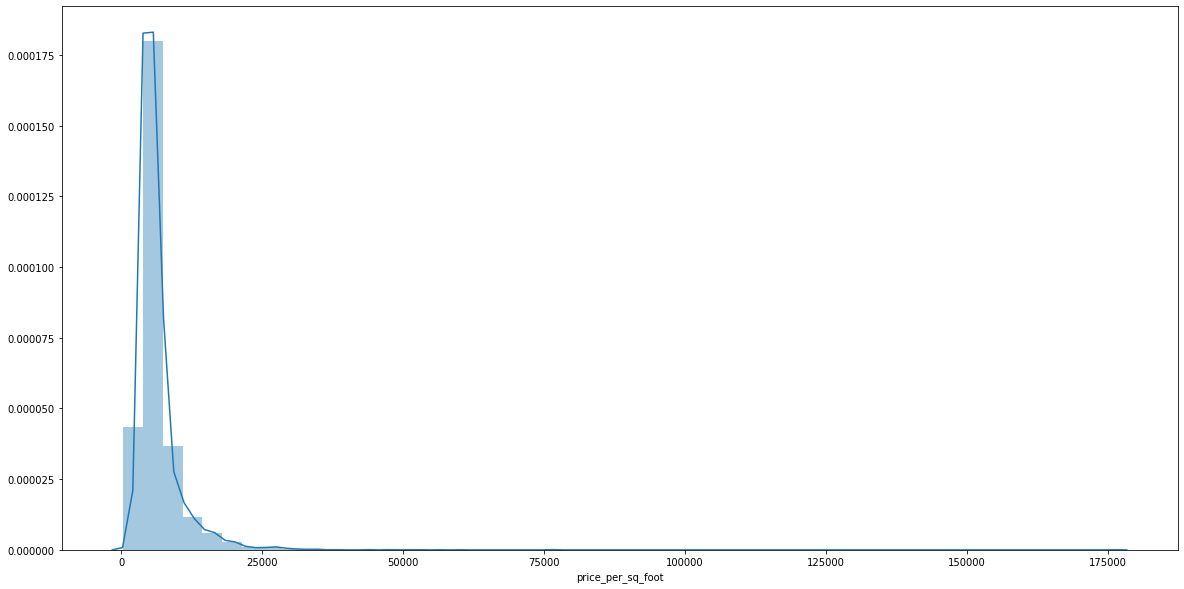

In [652]:
sns.distplot(df7['price_per_sq_foot'])

In [653]:
def remove_pps_outlier(df):
    out_df = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sq_foot)
        st = np.std(subdf.price_per_sq_foot)
        reduced_df = subdf[(subdf.price_per_sq_foot>(m-st)) & (subdf.price_per_sq_foot<=(m+st))]
        out_df = pd.concat([out_df,reduced_df],ignore_index=True)
    return out_df        

In [654]:
df7.shape

(12485, 6)

In [655]:
df7 = remove_pps_outlier(df7)

In [656]:
df7.shape

(10265, 6)

Visulaize the price comprasion between 2 Bhk and 3 bhk homes

In [657]:
def visualize_bhk(df,location):
    bhk2=df[(df['bhk'] == 2) & (df['location'] == location)]
    bhk3=df[(df['bhk'] == 3 )& (df['location'] == location)]
    plt.figure(figsize=(15,7))
    plt.scatter(x=bhk2.total_sqft,y=bhk2.price,marker="o",label="bhk_2")
    plt.scatter(x=bhk3.total_sqft,y=bhk3.price,marker="+",label="bhk_3")
    plt.xlabel("Total_Sqft")
    plt.ylabel("price")
    plt.legend()

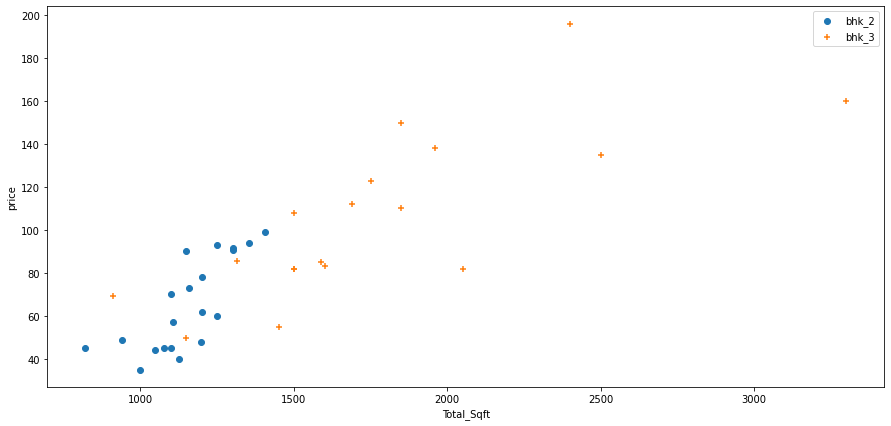

In [658]:
visualize_bhk(df7,'JP Nagar')

We will remove bhk outlier  in differrent locations

In [659]:
def remove_bhk_outlier(df):
    remove_indices = np.array([])
    for locatiion, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean':np.mean(bhk_df.price_per_sq_foot),
                'counts':bhk_df.shape[0],
                'std':np.std(bhk_df.price_per_sq_foot)
            }
            
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['counts']>5:
                remove_indices=np.append(remove_indices, bhk_df[bhk_df.price_per_sq_foot<stats['mean']].index.values)
    return df.drop(remove_indices, axis='index')
df8 = remove_bhk_outlier(df7)

In [660]:
df8.shape #Number of rows reduced to 7353 

(7328, 6)


### Visulaize after removing the outliers
* One can observe that some of ouliters are removed and the data is now more well fitting to a line

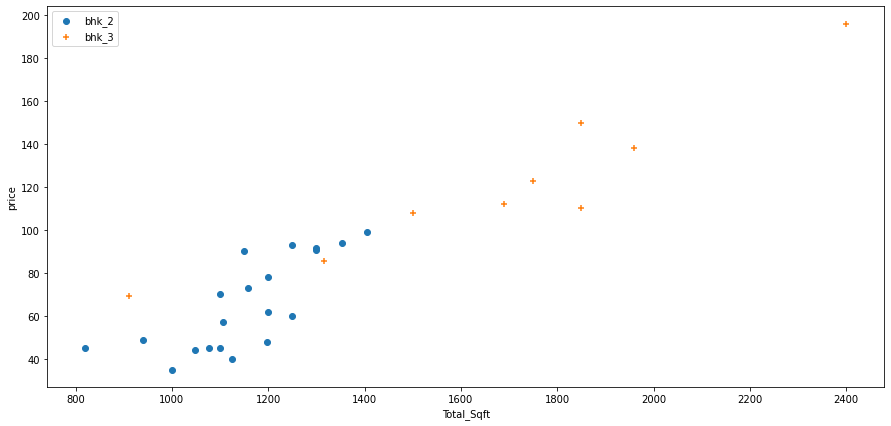

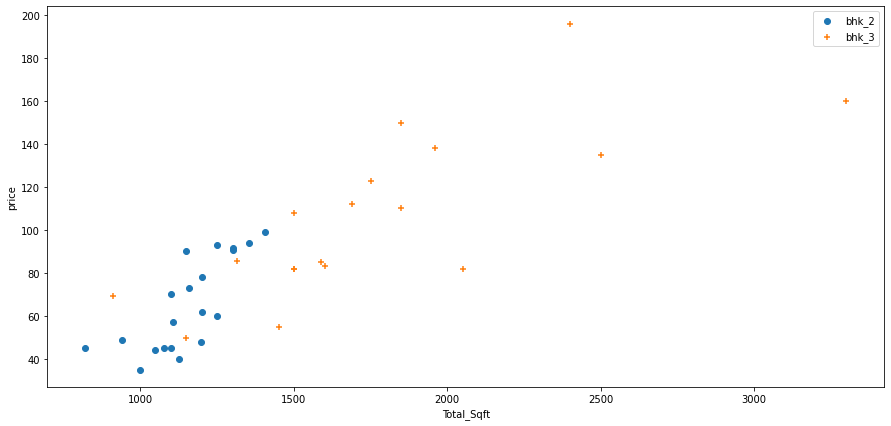

In [661]:
visualize_bhk(df8, 'JP Nagar')
visualize_bhk(df7, 'JP Nagar')

**We can see that the data is more noralized after removing bhk outliers**

Text(0, 0.5, 'Count')

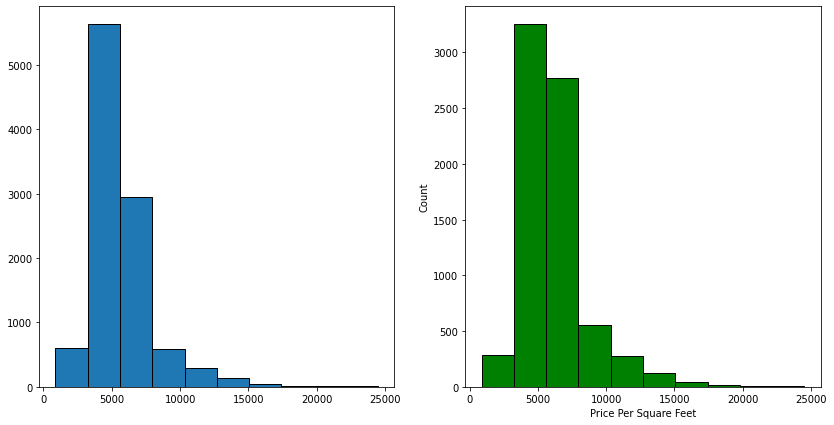

In [662]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(14,7))
ax1.hist(df7['price_per_sq_foot'],edgecolor = 'black')
ax2.hist(df8['price_per_sq_foot'],color = 'green',edgecolor='black')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

# Bathroom outliers

In [663]:
df8.bath.unique()

array([  4.,   3.,   2.,   5.,   1.,   8.,   6.,   7.,   9.,  12.,  16.,
        13.])

In [664]:
df8.isnull().sum() # bath have some null values we will drop them

location             0
total_sqft           0
bath                 0
price                0
bhk                  0
price_per_sq_foot    0
dtype: int64

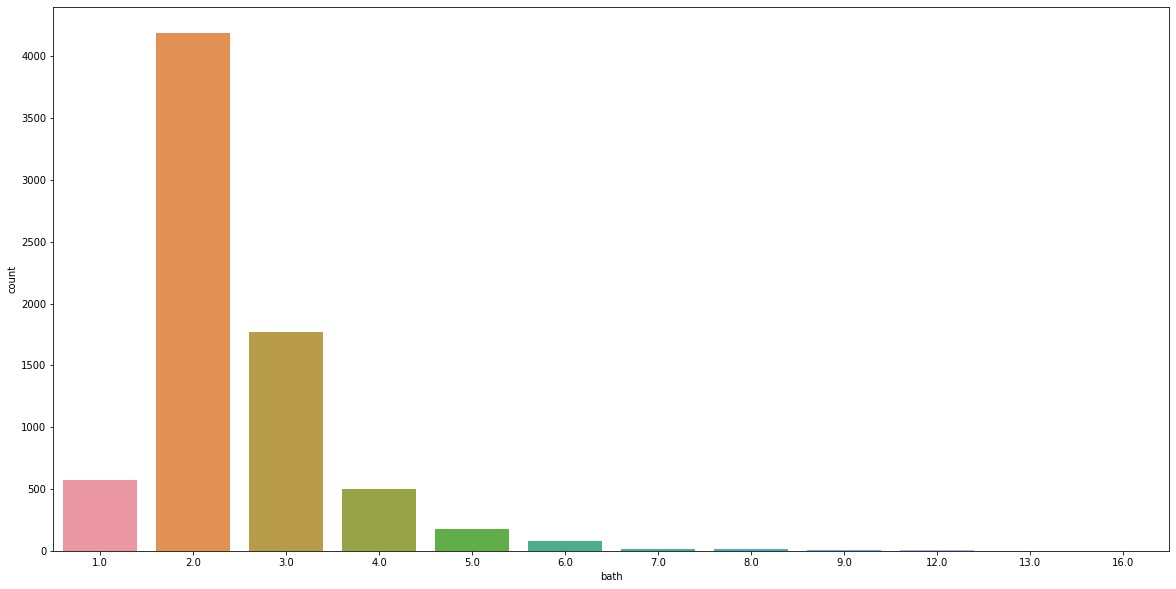

In [665]:
sns.countplot(x='bath',data=df8)

In [666]:
df8[df8.bath >10]

,location,total_sqft,bath,price,bhk,price_per_sq_foot
5289,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8501,other,12000.0,12.0,525.0,10,4375.000000
8590,other,10000.0,16.0,550.0,16,5500.000000
9326,other,6000.0,12.0,150.0,11,2500.000000
9658,other,5425.0,13.0,275.0,13,5069.124424


Remove all house with no. of bathrooms greater than bhk+2

In [667]:
df9 = df8[~(df8.bath>df8.bhk+2)]

In [668]:
df9.shape

(7324, 6)

# One-hot encoding for location

In [669]:
dummies = pd.get_dummies(df9.location)

In [670]:
df10=pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')

In [671]:
    df10.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk', 'price_per_sq_foot',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=246)

### Dropping columns locatiion, price_per_sqft 

In [672]:
df11 = df10.drop('location',axis='columns')

In [673]:
df11.shape

(7324, 245)

# Building Model 

In [685]:
X = df11.drop('price',axis='columns')
y = df11.price

## Spliting data into test and train datasets using test_train_split and  let's try liner regressor to train model

In [684]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X, y, test_size=.20, random_state=10)

In [683]:
from sklearn.linear_model import LinearRegression

lg_model = LinearRegression()
lg_model.fit(train_x, train_y)
lg_model.score(val_x, val_y)

0.86531326106022877

# Using k-fold cross validation to measure accuracy of algortihm 

In [714]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5, test_size=.2, random_state=2)
scores=cross_val_score(LinearRegression(), X, y, cv=cv)
scores

array([ 0.83355514,  0.89561025,  0.92128381,  0.65104618,  0.91566092])